## Final Project: Prediksi Harga Saham Bank di Indonesia

**Karina Anggraeni - JCDSAH BSD** </br>
Dataset diambil dari aplikasi Neo HOTS (Mirae Asset Sekuritas)

Data harga saham bank yang digunakan dalam dataset ini adalah data terhadap bank swasta nasional, bank swasta asing, dan bank milik negara, yaitu:
- Bank Central Asia (BBCA) dan Bank Mega (MEGA) - swasta nasional
- Bank Woori Saudara (SDRA) dan MayBank (BNII) - swasta asing
- Bank Rakyat Indonesia (BRII) dan Bank Mandiri (BMRI) - negara

### [PART 1: Data Cleaning, Exploration, and Visualization]

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

### 1. Data Exploration

#### 1.1 Data Preparation and Cleaning

In [4]:
compiled = pd.read_csv('dataset_saham.csv', sep = ';')
compiled.head()

,Date,Open,High,Low,Close,Adj Close,Change,Ratio(%),Volume,Value(T),Saham
0,30/12/2020,34000,34000,33500,33850,33850,25,"0,07",10535100,357007020,BBCA
1,29/12/2020,33875,34050,33700,33825,33825,-75,"0,22",6842500,231657885,BBCA
2,28/12/2020,33950,34100,33300,33900,33900,275,"0,81",12046800,407872662,BBCA
3,23/12/2020,34525,34525,33100,33625,33625,50,"0,14",15389600,519066797,BBCA
4,22/12/2020,33700,34100,33550,33575,33575,-575,"1,68",12358100,417055522,BBCA


Data harga saham di atas merupakan gabungan data historis dari 6 saham bank yang berbeda, selama kurun waktu 5 tahun (2016-2020). </br>

Adapun feature yang ada di dalam dataset tersebut adalah:
- Feature `Date` memberikan keterangan waktu harian
- Feature `Open` dan `Close` masing-masing menunjukkan harga saham pada saat bursa dibuka dan ditutup pada hari yang bersangkutan
- Feature ` High` dan `Low` masing-masing menunjukkan harga tertinggi dan terendah pada hari yang bersangkutan
- Feature `Adj Close` menunjukkan harga saham yang telah disesuaikan terhadap pembagian dividen kepada pemegang saham
- Feature `Change` menunjukkan perubahan harga saham pada hari yang bersangkutan dibandingkan dengan hari sebelumnya
- Feature `Ratio(%)` menunjukkan persentase perubahan harga saham
- Feature `Volume` menunjukkan banyaknya volume saham yang diperdagangkan dalam satuan lot (per 100 lembar saham)
- Feature `Value(T)` menunjukkan total transaksi yang terjadi di pasar modal pada hari yang bersangkutan
- Feature `Saham` menunjukkan saham bank yang bersangkutan

In [3]:
compiled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7266 entries, 0 to 7265
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       7266 non-null   object
 1   Open       7266 non-null   int64 
 2   High       7266 non-null   int64 
 3   Low        7266 non-null   int64 
 4   Close      7266 non-null   int64 
 5   Adj Close  7261 non-null   object
 6   Change     7266 non-null   int64 
 7   Ratio(%)   7266 non-null   object
 8   Volume     7266 non-null   int64 
 9   Value(T)   7266 non-null   int64 
 10  Saham      7266 non-null   object
dtypes: int64(7), object(4)
memory usage: 624.5+ KB


Dari informasi yang diberikan, dapat dilihat bahwa terdapat ketidakcocokan antara jenis data seharusnya dengan jenis data yang tercantum pada _Dtype_. Feature `Date` seharusnya berisi data dengan jenis _datetime_ serta feature `Adj Close` dan `Ratio(%)` seharusnya berisi data _float_.

Strategi yang akan dilakukan:
- Mengganti tipe data feature `Date` menjadi berbentuk _datetime_
- Mengganti bentuk standard excel csv ',' menjadi '.' pada feature `Adj Close` dan `Ratio(%)`

In [5]:
compiled['Date'] = pd.to_datetime(compiled['Date'])
compiled['Adj Close'] = pd.to_numeric(compiled['Adj Close'].str.replace(',', '.'))
compiled['Ratio(%)'] = pd.to_numeric(compiled['Ratio(%)'].str.replace(',', '.'))
compiled.head()

,Date,Open,High,Low,Close,Adj Close,Change,Ratio(%),Volume,Value(T),Saham
0,2020-12-30,34000,34000,33500,33850,33850.0,25,0.07,10535100,357007020,BBCA
1,2020-12-29,33875,34050,33700,33825,33825.0,-75,0.22,6842500,231657885,BBCA
2,2020-12-28,33950,34100,33300,33900,33900.0,275,0.81,12046800,407872662,BBCA
3,2020-12-23,34525,34525,33100,33625,33625.0,50,0.14,15389600,519066797,BBCA
4,2020-12-22,33700,34100,33550,33575,33575.0,-575,1.68,12358100,417055522,BBCA


Jika kita perhatikan, nilai pada feature `Ratio(%)` pada index ke-1 dan ke-4 seharusnya bernilai negatif. Berarti nilai pada feature tersebut harus kita sesuaikan terlebih dahulu, mengikuti tanda pada feature `Change`.

In [6]:
adj_ratio = []

for i, j in zip(compiled['Ratio(%)'], compiled['Change']):
    if j < 0:
        k = -1 * i
        adj_ratio.append(k)
    else:
        adj_ratio.append(i)

In [6]:
compiled.insert(8, 'Adj Ratio', adj_ratio)
compiled.head()

,Date,Open,High,Low,Close,Adj Close,Change,Ratio(%),Adj Ratio,Volume,Value(T),Saham
0,2020-12-30,34000,34000,33500,33850,33850.0,25,0.07,0.07,10535100,357007020,BBCA
1,2020-12-29,33875,34050,33700,33825,33825.0,-75,0.22,-0.22,6842500,231657885,BBCA
2,2020-12-28,33950,34100,33300,33900,33900.0,275,0.81,0.81,12046800,407872662,BBCA
3,2020-12-23,34525,34525,33100,33625,33625.0,50,0.14,0.14,15389600,519066797,BBCA
4,2020-12-22,33700,34100,33550,33575,33575.0,-575,1.68,-1.68,12358100,417055522,BBCA


Akan dilakukan pemeriksaan tipe data dan jumlah missing value untuk setiap feature pada dataset.

In [7]:
compiled_list = []
for i in compiled.columns:
    compiled_list.append([i, compiled[i].dtype, compiled[i].isna().sum(), round((compiled[i].isna().sum()/len(compiled[i]))*100,2),
                      compiled[i].nunique(), list(compiled[i].sample(5).drop_duplicates().values)])

compiled_desc = pd.DataFrame(columns = ['Feature Name', 'Type', 'Sum of Null', 'Null Percentage', 'Unique Values', 'Unique  Samples'],data = compiled_list)

In [8]:
compiled_desc

,Feature Name,Type,Sum of Null,Null Percentage,Unique Values,Unique Samples
0,Date,datetime64[ns],0,0.00,1211,"[2020-05-11T00:00:00.000000000, 2017-06-04T00:..."
1,Open,int64,0,0.00,1236,"[29000, 13600, 3000, 3530, 23500]"
2,High,int64,0,0.00,1255,"[3045, 5400, 165, 3020, 5600]"
3,Low,int64,0,0.00,1255,"[15450, 2800, 3040, 31000, 12900]"
4,Close,int64,0,0.00,1243,"[162, 222, 2190, 6100, 2070]"
5,Adj Close,float64,5,0.07,2412,"[2862.59, 3160.0, 823.14, 321.15, 3392.36]"
6,Change,int64,0,0.00,225,"[12, 0, 30, 35]"
7,Ratio(%),float64,0,0.00,722,"[0.72, 3.34, 0.0, 0.81, 6.44]"
8,Adj Ratio,float64,0,0.00,1146,"[0.0, 0.23, -5.09, -4.53]"
9,Volume,int64,0,0.00,5047,"[130, 10, 8180800, 112925500, 83615200]"


Karena data yang kita miliki merupakan data time series, maka nilai missing value pada feature `Adj Close` akan diisi menggunakan metode _back fill_ (mengisi harga saham yang tidak tercatat menggunakan harga dari hari sebelumnya).

In [7]:
compiled['Adj Close'] = compiled['Adj Close'].fillna(method = 'bfill')
compiled['Adj Close'].isna().sum()

0

Sekarang feature `Adj Close` sudah di-impute dan tidak memiliki missing value.

In [10]:
compiled.describe()

,Open,High,Low,Close,Adj Close,Change,Ratio(%),Adj Ratio,Volume,Value(T)
count,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7266.000000,7.266000e+03,7.266000e+03
mean,6373.323975,6437.215524,6306.548307,6375.171346,6070.395431,3.844894,1.414631,0.080929,3.283680e+07,1.851870e+08
std,8231.806348,8307.164057,8145.367999,8228.305311,8043.362792,174.960353,2.419988,2.802008,5.975552e+07,2.503628e+08
min,115.000000,122.000000,107.000000,114.000000,110.700000,-2175.000000,0.000000,-24.530000,0.000000e+00,0.000000e+00
25%,850.000000,860.000000,850.000000,850.000000,836.600000,-20.000000,0.000000,-0.660000,1.700000e+01,3.128000e+03
50%,3320.000000,3365.000000,3280.000000,3330.000000,3128.250000,0.000000,0.670000,0.000000,3.741371e+06,5.669609e+07
75%,6750.000000,6850.000000,6650.000000,6750.000000,6327.490000,20.000000,1.750000,0.680000,4.140372e+07,3.147199e+08
max,34825.000000,35300.000000,34200.000000,34750.000000,34750.000000,3900.000000,34.440000,34.440000,8.726073e+08,3.660852e+09


In [11]:
compiled.describe(include = 'object')

,Saham
count,7266
unique,6
top,BBRI
freq,1211


#### 1.2 Feature Engineering

Terdapat total 7266 data gabungan dari 6 saham berbeda. Selanjutnya akan dilakukan EDA terhadap data saham gabungan (dataset _compiled_) dan data tiap saham, sehingga akan dibuat dataset baru untuk masing-masing saham tersebut.

In [59]:
bbca = compiled[compiled['Saham'] == 'BBCA'].sort_values('Date').set_index('Date')
mega = compiled[compiled['Saham'] == 'MEGA'].sort_values('Date').set_index('Date')
bbri = compiled[compiled['Saham'] == 'BBRI'].sort_values('Date').set_index('Date')
bmri = compiled[compiled['Saham'] == 'BMRI'].sort_values('Date').set_index('Date')
sdra = compiled[compiled['Saham'] == 'SDRA'].sort_values('Date').set_index('Date')
bnii = compiled[compiled['Saham'] == 'BNII'].sort_values('Date').set_index('Date')

In [60]:
bbca.head()

,Open,High,Low,Close,Adj Close,Change,Ratio(%),Adj Ratio,Volume,Value(T),Saham
Date,,,,,,,,,,,
2016-01-02,13100,13225,12975,13225,12361.16,125,0.95,0.95,17874200,233674417,BBCA
2016-01-03,13475,13550,13350,13400,12524.73,-75,0.55,-0.55,15918100,213666497,BBCA
2016-01-04,13300,13325,13200,13300,12431.26,0,0.00,0.00,14760500,195925937,BBCA
2016-01-06,13100,13175,13050,13175,12414.31,175,1.34,1.34,16483600,216351505,BBCA
2016-01-07,13375,13475,13200,13225,12461.43,-100,0.75,-0.75,25339100,337757977,BBCA


Saya ingin membandingkan harga `Close` dan `Adj Close` dari masing-masing saham dalam kurun waktu satu tahun ke belakang.

In [14]:
compiled_adj_close = pd.concat([bbca['Adj Close'].iloc[-242:], bbri['Adj Close'].iloc[-242:], bmri['Adj Close'].iloc[-242:], mega['Adj Close'].iloc[-242:], sdra['Adj Close'].iloc[-242:], bnii['Adj Close'].iloc[-242:]], axis = 1, keys = ['BBCA', 'BRII', 'BMRI', 'MEGA', 'SDRA', 'BNII'])
compiled_adj_close_sum = compiled_adj_close.sum().tolist()
compiled_adj_close_sum

[7222080.549999993,
 845391.9400000001,
 1404798.4599999997,
 1522320.0800000005,
 195215.37000000002,
 46961.2]

In [15]:
compiled_close = pd.concat([bbca['Close'].iloc[-242:], bbri['Close'].iloc[-242:], bmri['Close'].iloc[-242:], mega['Close'].iloc[-242:], sdra['Close'].iloc[-242:], bnii['Close'].iloc[-242:]], axis = 1, keys = ['BBCA', 'BRII', 'BMRI', 'MEGA', 'SDRA', 'BNII'])
compiled_close_sum = compiled_close.sum().tolist()
compiled_close_sum

[7282700, 852200, 1419590, 1572550, 196225, 47309]

In [16]:
compare_ratio = []

for i, j in zip(compiled_adj_close_sum, compiled_close_sum):
    diff = round((j-i)/j, 5)
    compare_ratio.append(diff)
                         
compare_ratio

[0.00832, 0.00799, 0.01042, 0.03194, 0.00515, 0.00735]

In [17]:
compare = {'Adj Close Sum' : compiled_adj_close_sum, 'Close Sum': compiled_close_sum, 'Diff' : compare_ratio}
compare_price = pd.DataFrame.from_dict(compare, orient='index',
                       columns = ['BBCA', 'BRII', 'BMRI', 'MEGA', 'SDRA', 'BNII'])
compare_price

,BBCA,BRII,BMRI,MEGA,SDRA,BNII
Adj Close Sum,7.222081e+06,845391.94000,1.404798e+06,1.522320e+06,195215.37000,46961.20000
Close Sum,7.282700e+06,852200.00000,1.419590e+06,1.572550e+06,196225.00000,47309.00000
Diff,8.320000e-03,0.00799,1.042000e-02,3.194000e-02,0.00515,0.00735


Karena pada umumnya harga `Adj Close` dan harga `Close` tidak jauh berbeda (perbedaan > 5%), maka untuk selanjutnya hanya akan digunakan harga `Close` untuk melihat trend pergerakan harga saham.

</br>

### 2. Data Visualization and Insight

#### a. Saham dengan likuiditas tinggi

In [18]:
compiled_liquid = compiled[['Volume', 'Saham']].groupby('Saham', as_index = False).sum().sort_values('Volume', ascending = False)
compiled_liquid

,Saham,Volume
1,BBRI,160666095500
2,BMRI,56793291200
0,BBCA,21068590100
3,BNII,63985098
5,SDRA,125292
4,MEGA,75388


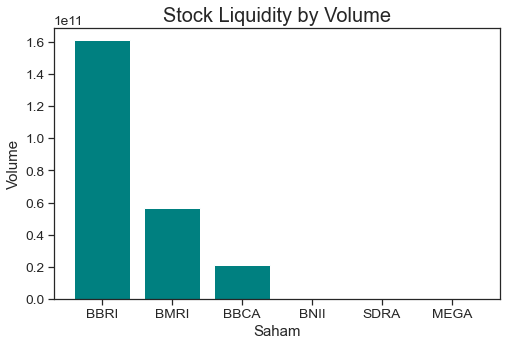

In [69]:
plt.figure(figsize = (8,5))
plt.bar(compiled_liquid['Saham'], compiled_liquid['Volume'], color = 'teal')
plt.xlabel('Saham')
plt.ylabel('Volume')
plt.title('Stock Liquidity by Volume', size = 20)

plt.savefig('Stock Liquidity.png')
plt.show()

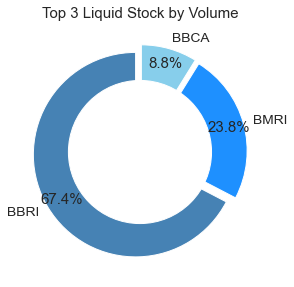

In [88]:
# Pie chart
labels = compiled_liquid['Saham'].head(3)
sizes = compiled_liquid['Volume'].head(3)

#colors
colors = ['steelblue', 'dodgerblue', 'skyblue']
#explosion
explode = (0.05, 0.05, 0.05)
 
plt.pie(sizes, colors = colors, labels = labels, autopct = '%1.1f%%', startangle = 90, pctdistance = 0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0), 0.70,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Top 3 Liquid Stock by Volume')

plt.savefig('Top 3 Liquid.png', bbox_inches='tight')
plt.show()

Pie chart di atas memberikan informasi tiga saham yang memiliki volume transaksi paling besar di bursa selama kurun waktu 5 tahun. Posisi pertama ditempati oleh BBRI, diikuti oleh BMRI, dan BBCA. Hal ini mengindikasikan bahwa ketiga saham tersebut termasuk ke dalam golongan saham yang diminati oleh investor, tidak heran jika BBRI, BMRI, dan BBCA juga tergabung dalam indeks saham LQ45.

MEGA, SDRA, dan BNII tidak menunjukkan volume transaksi yang signifikan dibandingkan dengan ketiga saham tersebut, jadi saya tidak menyertakan MEGA, SDRA, dan BNII ke dalam pie chart.

#### b. Saham dengan likuiditas rendah

In [21]:
compiled_non_liquid = compiled[['Volume', 'Saham']][compiled['Volume'] == 0].groupby('Saham', as_index = False).count().sort_values('Volume', ascending = False)
compiled_non_liquid

,Saham,Volume
1,SDRA,587
0,MEGA,530


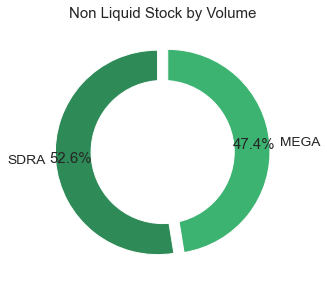

In [90]:
# Pie chart
labels = compiled_non_liquid['Saham']
sizes = compiled_non_liquid['Volume']

#colors
colors = ['seagreen', 'mediumseagreen']
#explosion
explode = (0.05, 0.05)
 
plt.pie(sizes, colors = colors, labels = labels, autopct = '%1.1f%%', startangle = 90, pctdistance = 0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0), 0.70,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Non Liquid Stock by Volume')

plt.savefig('Non Liquid.png', bbox_inches='tight')
plt.show()

Dengan melihat banyak volume transaksi sebesar 0 paling banyak, kita dapat melihat saham apa saja yang memiliki likuiditas rendah. Dengan kata lain, saham SDRA dan MEGA merupakan saham yang tidak terlalu diminati oleh investor.

#### c. Trend pergerakan harga saham (general)

> **Data historis harga saham selama 1 tahun (Jan 2020 - Des 2020)**

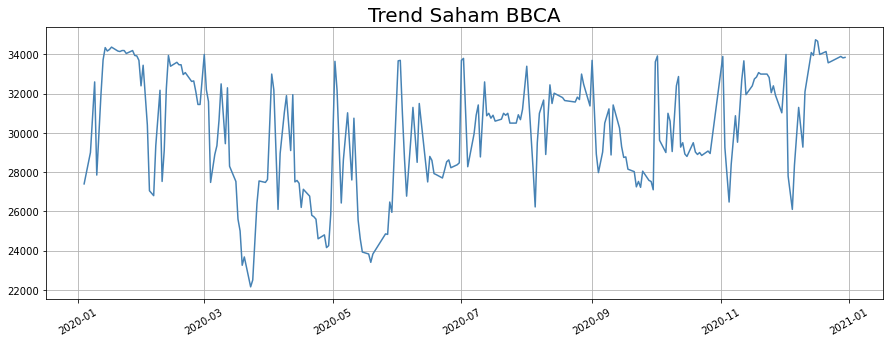

In [23]:
plt.figure(figsize = (15,5))
plt.plot(bbca['Close'].iloc[-242:], color = 'steelblue')
plt.title('Trend Saham BBCA', size = 20)
plt.xticks(rotation = 30)
plt.grid()
plt.show()

Dari line chart di atas, dapat kita lihat bahwa saham BBCA bergerak naik (uptrend) mulai pertengahan tahun 2020.

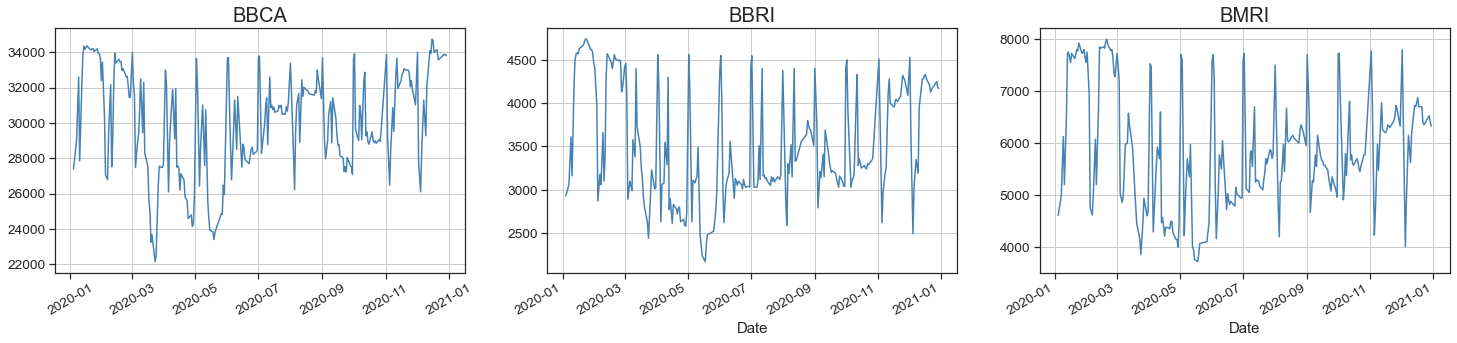

In [72]:
plt.figure(figsize = (25,5))
plt.subplot(131)
plt.plot(bbca['Close'].iloc[-242:], color = 'steelblue')
plt.title('BBCA', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(132)
bbri['Close'].iloc[-242:].plot(color = 'steelblue')
plt.title('BBRI', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(133)
bmri['Close'].iloc[-242:].plot(color = 'steelblue')
plt.title('BMRI', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.savefig('BBCA BBRI BMRI.png')
plt.show() 

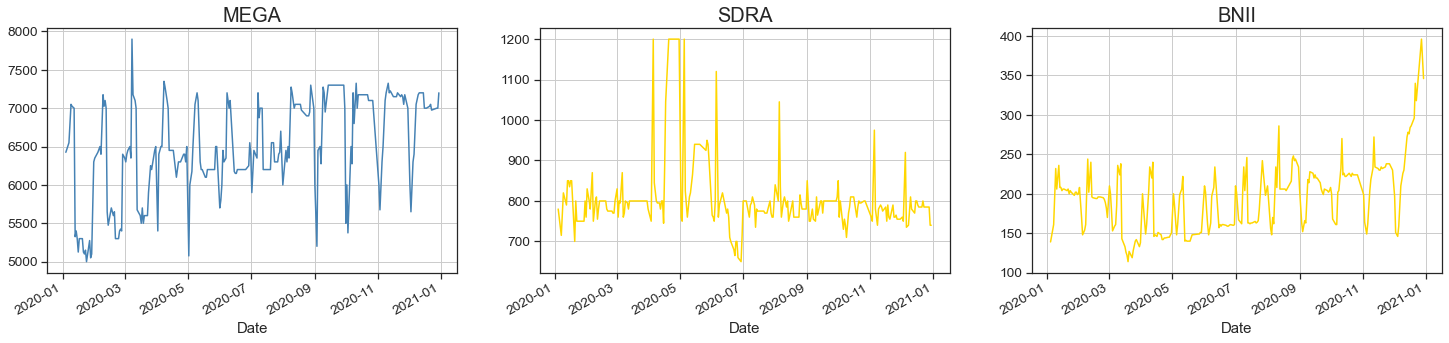

In [73]:
plt.figure(figsize = (25,5))
plt.subplot(131)
mega['Close'].iloc[-242:].plot(color = 'steelblue')
plt.title('MEGA', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(132)
sdra['Close'].iloc[-242:].plot(color = 'gold')
plt.title('SDRA', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(133)
bnii['Close'].iloc[-242:].plot(color = 'gold')
plt.title('BNII', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.savefig('MEGA SDRA BNII.png')
plt.show()

Dalam kurun waktu 1 tahun (Jan 2020 - Des 2020), saham bank yang terdaftar dalam LQ45 yaitu BBCA, BBRI, dan BMRI diawali dengan trend sideways yang berangsur berubah menjadi uptrend pada pertengahan tahun 2020. Begitu pula dengan saham MEGA. Saham SDRA terlihat bergerak secara sideways (trend tidak naik ataupun turun). Saham BNII juga cenderung sideways, namun terjadi loncatan harga di akhir tahun 2020.

> **Data historis harga saham selama 5 tahun (Jan 2016 - Des 2020)**

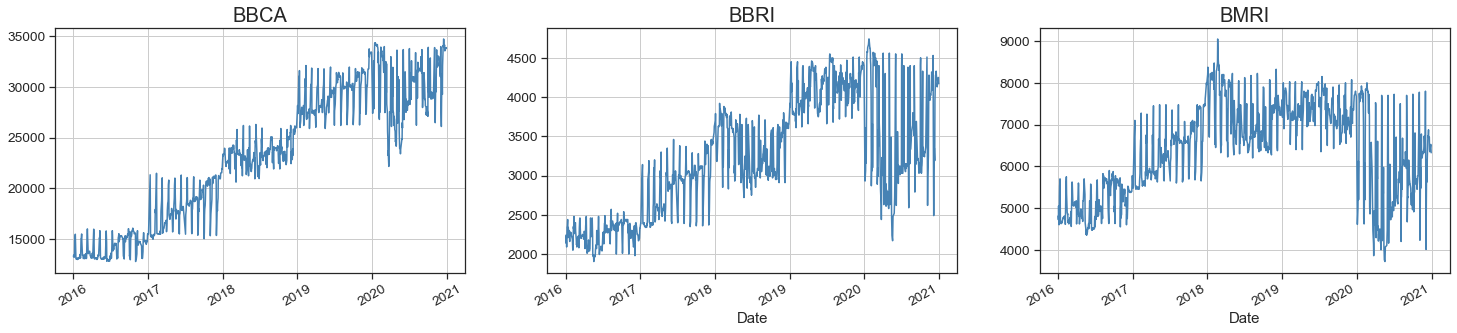

In [74]:
plt.figure(figsize = (25,5))
plt.subplot(131)
plt.plot(bbca['Close'], color = 'steelblue')
plt.title('BBCA', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(132)
bbri['Close'].plot(color = 'steelblue')
plt.title('BBRI', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(133)
bmri['Close'].plot(color = 'steelblue')
plt.title('BMRI', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.savefig('BBCA BBRI BMRI All.png')
plt.show() 

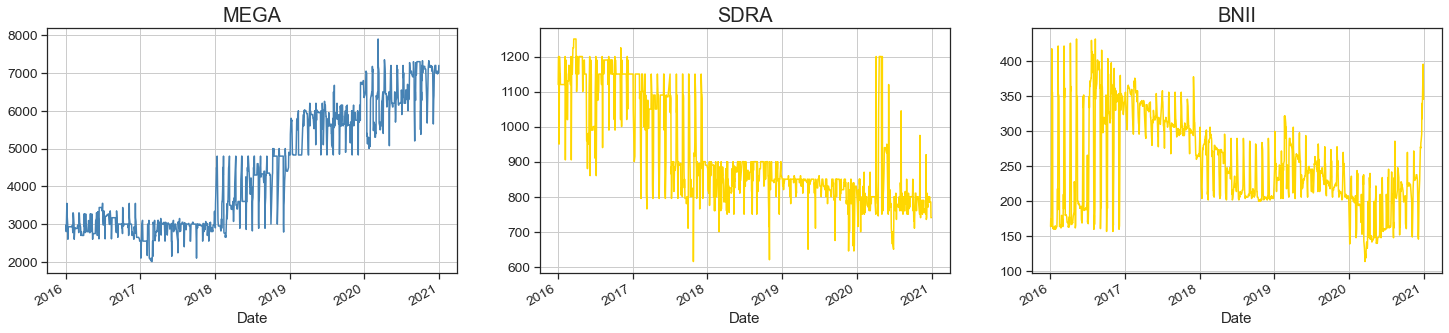

In [75]:
plt.figure(figsize = (25,5))
plt.subplot(131)
mega['Close'].plot(color = 'steelblue')
plt.title('MEGA', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(132)
sdra['Close'].plot(color = 'gold')
plt.title('SDRA', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(133)
bnii['Close'].plot(color = 'gold')
plt.title('BNII', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.savefig('MEGA SDRA BNII All.png')
plt.show()

#### d. Return saham

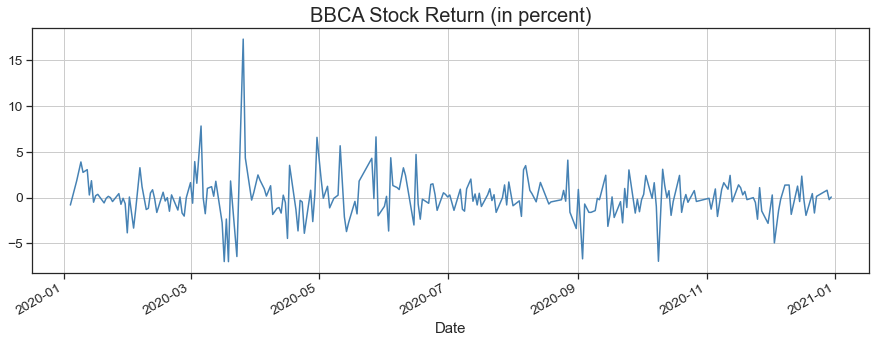

In [93]:
plt.figure(figsize = (15,5))
bbca['Adj Ratio'].iloc[-242:].plot(color = 'steelblue')
plt.title('BBCA Stock Return (in percent)', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.savefig('BBCA Return.png')
plt.show()

In [29]:
bbca['Adj Ratio'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
Adj Ratio,1211.0,0.088142,1.504325,-7.0,-0.565,0.0,0.725,17.33


Return saham dilihat dari besarnya rasio perubahan harga `Close` setiap harinya. Rasio ini berguna untuk memperkirakan, kira-kira berapa persen keuntungan atau kerugian yang akan dialami investor yang menanam saham pada bank tersebut.

Dilihat dari grafik di atas, selama satu tahun ke belakang, return yang diberikan BBCA berkisar antara 5% hingga -5%. Dari perhitungan sederhana yang telah dilakukan, dapat kita lihat bahwa minimal return yang dapat dialami investor adalah sebesar 7% (tidak terjadi penurunan harga secara drastis) sementara maksimal return yang dapat dialami investor adalah sebesar 17.33%.

Hal ini dapat dikarenakan adanya berita/ sentimen baik terhadap BBCA sekitar bulan Maret - April 2020 (misalnya pembagian dividen), sehingga banyak investor yang membeli saham BBCA dan mengakibatkan lonjakan harga.

BBCA rata-rata memberikan return sebesar 8%, perlu diingat nilai ini terlihat tinggi karena diakibatkan oleh lonjakan return yang terjadi pada bulan Maret 0 April 2020.

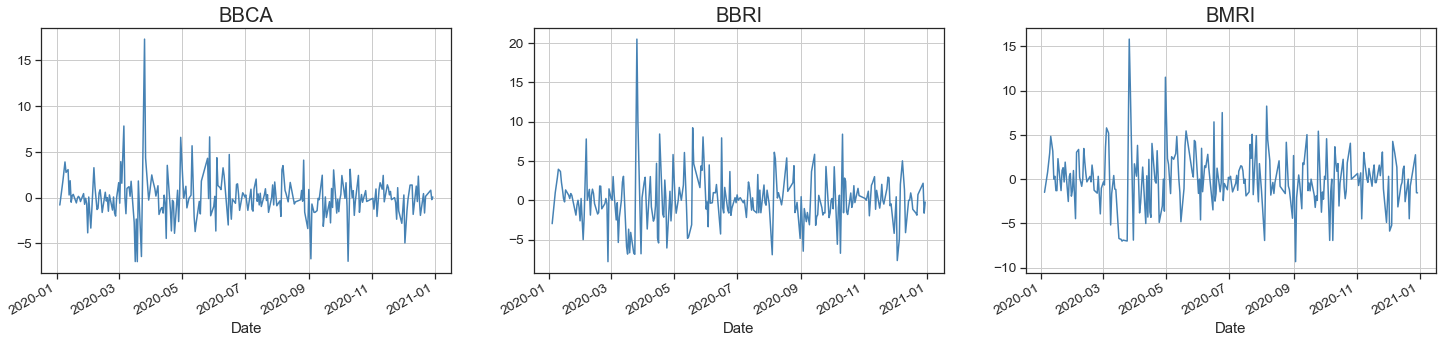

In [77]:
plt.figure(figsize = (25,5))
plt.subplot(131)
bbca['Adj Ratio'].iloc[-242:].plot(color = 'steelblue')
plt.title('BBCA', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(132)
bbri['Adj Ratio'].iloc[-242:].plot(color = 'steelblue')
plt.title('BBRI', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(133)
bmri['Adj Ratio'].iloc[-242:].plot(color = 'steelblue')
plt.title('BMRI', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.savefig('BBCA BBRI BMRI Ratio.png')
plt.show() 

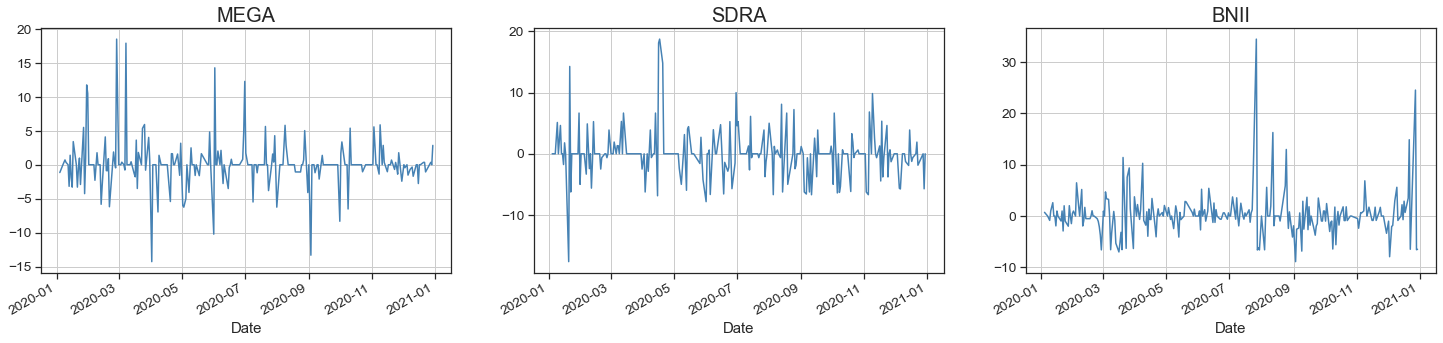

In [78]:
plt.figure(figsize = (25,5))
plt.subplot(131)
mega['Adj Ratio'].iloc[-242:].plot(color = 'steelblue')
plt.title('MEGA', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(132)
sdra['Adj Ratio'].iloc[-242:].plot(color = 'steelblue')
plt.title('SDRA', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.subplot(133)
bnii['Adj Ratio'].iloc[-242:].plot(color = 'steelblue')
plt.title('BNII', size = 20)
plt.xticks(rotation = 30)
plt.grid()

plt.savefig('MEGA SDRA BNII Ratio.png')
plt.show() 

#### e. Trend harga saham (berdasarkan kategori return)

In [32]:
def trend(x):
  if x > -0.05 and x <= 0.05:
    return 'Slight or No change'
  elif x > 0.05 and x <= 0.1:
    return 'Slight Positive'
  elif x > -0.1 and x <= -0.05:
    return 'Slight Negative'
  elif x > 0.1 and x <= 0.3:
    return 'Positive'
  elif x > -0.3 and x <= -0.1:
    return 'Negative'
  elif x > 0.3 and x <= 0.7:
    return 'Among top gainers'
  elif x > -0.7 and x <= -0.3:
    return 'Among top losers'
  elif x > 0.7:
    return 'Bull run'
  elif x <= -0.7:
    return 'Bear drop'

In [33]:
bbca['Trend Category'] = np.zeros(bbca['Adj Ratio'].count())
bbca['Trend Category'] = bbca['Adj Ratio'].apply(lambda x:trend(x))
bbca.head()

,Open,High,Low,Close,Adj Close,Change,Ratio(%),Adj Ratio,Volume,Value(T),Saham,Trend Category
Date,,,,,,,,,,,,
2016-01-02,13100,13225,12975,13225,12361.16,125,0.95,0.95,17874200,233674417,BBCA,Bull run
2016-01-03,13475,13550,13350,13400,12524.73,-75,0.55,-0.55,15918100,213666497,BBCA,Among top losers
2016-01-04,13300,13325,13200,13300,12431.26,0,0.00,0.00,14760500,195925937,BBCA,Slight or No change
2016-01-06,13100,13175,13050,13175,12414.31,175,1.34,1.34,16483600,216351505,BBCA,Bull run
2016-01-07,13375,13475,13200,13225,12461.43,-100,0.75,-0.75,25339100,337757977,BBCA,Bear drop


In [34]:
bbca_pie = bbca[['Adj Ratio', 'Trend Category']].groupby('Trend Category', as_index = False).count().sort_values('Adj Ratio', ascending = False)
bbca_pie

,Trend Category,Adj Ratio
3,Bull run,309
2,Bear drop,270
0,Among top gainers,157
1,Among top losers,136
4,Negative,104
8,Slight or No change,99
5,Positive,91
6,Slight Negative,26
7,Slight Positive,19


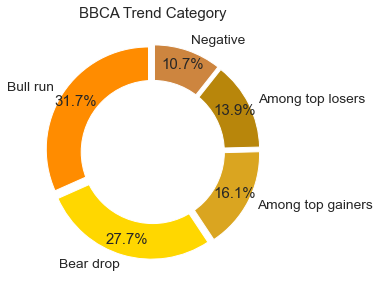

In [91]:
# Pie chart
labels = bbca_pie['Trend Category'].head()
sizes = bbca_pie['Adj Ratio'].head()

#colors
colors = ['darkorange', 'gold', 'goldenrod', 'darkgoldenrod', 'peru']
#explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
 
plt.pie(sizes, colors = colors, labels = labels, autopct = '%1.1f%%', startangle = 90, pctdistance = 0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0), 0.70,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('BBCA Trend Category')

plt.savefig('BBCA Trend Category.png', bbox_inches='tight')
plt.show()

Dari keseluruhan data historis BBCA dalam kurun waktu 5 tahun, mayoritas return yang diberikan tergolong dalam kategori bull run. Berarti terjadi banyak kenaikan harga dan return yang diberikan juga besar. 

Namun return investasi yang besar juga diiringi dengan risiko yang besar. Hal ini terlihat dari persentasi bear drop yang menempati posisi kedua tertinggi.

In [36]:
mega['Trend Category'] = np.zeros(mega['Adj Ratio'].count())
mega['Trend Category'] = mega['Adj Ratio'].apply(lambda x:trend(x))
mega.head()

,Open,High,Low,Close,Adj Close,Change,Ratio(%),Adj Ratio,Volume,Value(T),Saham,Trend Category
Date,,,,,,,,,,,,
2016-01-02,2930,2930,2930,2930,2518.86,0,0.0,0.0,0,0,MEGA,Slight or No change
2016-01-03,2975,2975,2975,2975,2557.54,0,0.0,0.0,0,0,MEGA,Slight or No change
2016-01-04,2800,2800,2800,2800,2407.10,0,0.0,0.0,0,0,MEGA,Slight or No change
2016-01-06,3300,3300,3300,3300,2907.95,0,0.0,0.0,0,0,MEGA,Slight or No change
2016-01-07,3550,3550,3550,3550,3128.25,0,0.0,0.0,0,0,MEGA,Slight or No change


In [37]:
mega_pie = mega[['Adj Ratio', 'Trend Category']].groupby('Trend Category', as_index = False).count().sort_values('Adj Ratio', ascending = False)
mega_pie

,Trend Category,Adj Ratio
6,Slight or No change,761
2,Bear drop,196
3,Bull run,184
1,Among top losers,37
0,Among top gainers,25
4,Negative,5
5,Positive,3


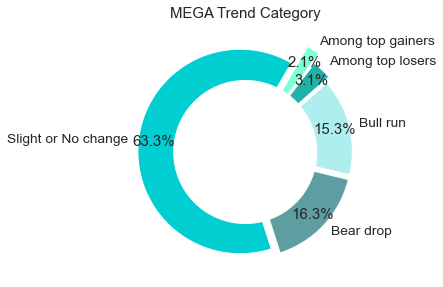

In [92]:
# Pie chart
labels = mega_pie['Trend Category'].head()
sizes = mega_pie['Adj Ratio'].head()

#colors
colors = ['darkturquoise', 'cadetblue', 'paleturquoise', 'lightseagreen', 'aquamarine']
#explosion
explode = (0.05, 0.05, 0.05, 0.1, 0.2)
 
plt.pie(sizes, colors = colors, labels = labels, autopct = '%1.1f%%', startangle = 60, pctdistance = 0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0), 0.70,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('MEGA Trend Category')

plt.savefig('MEGA Trend Category.png', bbox_inches='tight')
plt.show()

Saya membandingkan kategori return BBCA dengan bank swasta nasional lainnya, yaitu MEGA.

Dari keseluruhan data historis saham MEGA dalam kurun waktu 5 tahun, return yang diberikan berkisar sekitar -5% hingga 5% (slight or no change). Berarti tidak terjadi banyak perubahan harga dan return selama 5 tahun tersebut.

#### f. Korelasi antar saham

In [39]:
compiled_ratio = pd.concat([bbca['Adj Ratio'], bbri['Adj Ratio'], bmri['Adj Ratio'], mega['Adj Ratio'], sdra['Adj Ratio'], bnii['Adj Ratio']], axis = 1, keys = ['BBCA', 'BRII', 'BMRI', 'MEGA', 'SDRA', 'BNII'])
compiled_ratio.head()

,BBCA,BRII,BMRI,MEGA,SDRA,BNII
Date,,,,,,
2016-01-02,0.95,0.00,0.26,0.0,0.00,1.23
2016-01-03,-0.55,-3.38,-1.04,0.0,0.00,0.00
2016-01-04,0.00,-2.84,-1.94,0.0,0.00,0.61
2016-01-06,1.34,0.96,1.93,0.0,0.00,-1.55
2016-01-07,-0.75,-0.46,-1.31,0.0,9.89,4.51


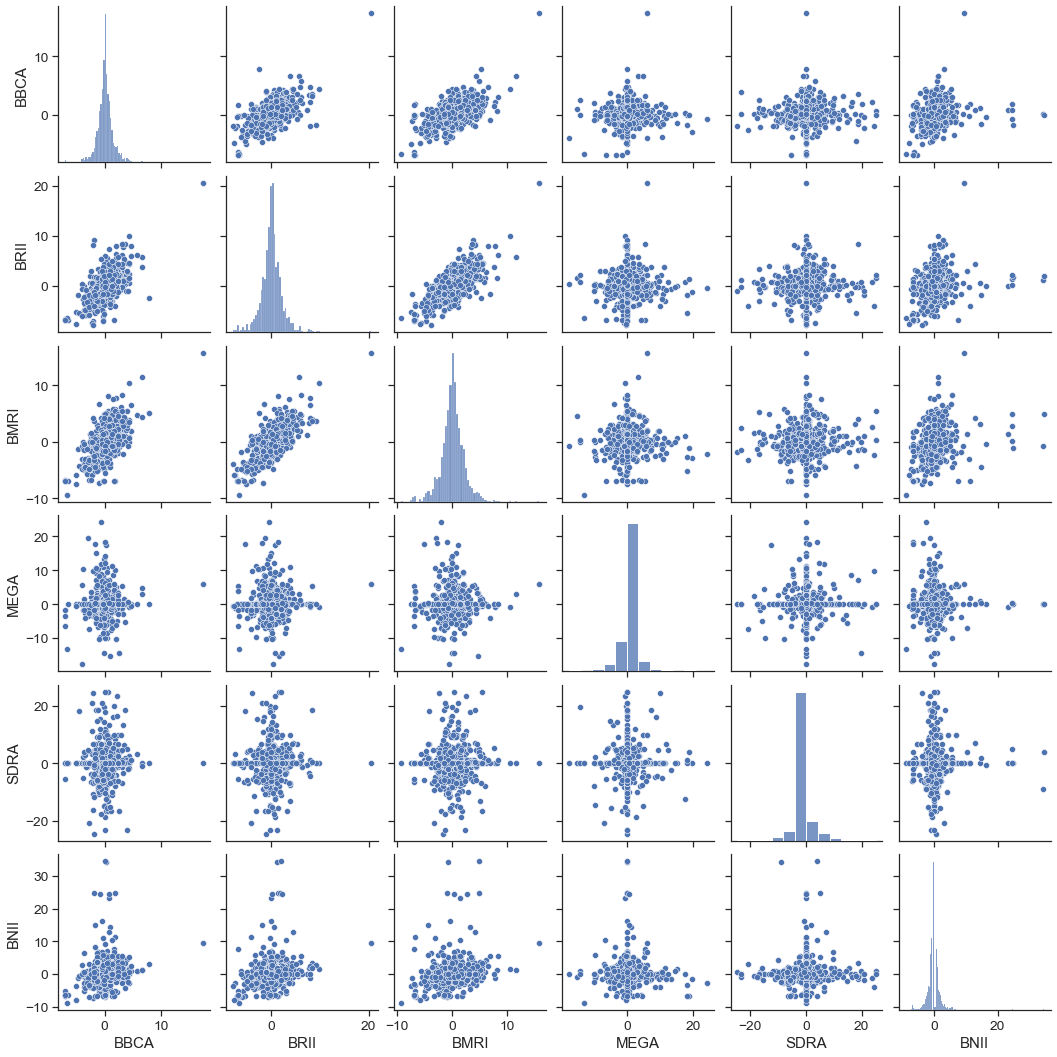

In [40]:
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(compiled_ratio)

plt.show()

Akan dilakukan normality test terhadap feature `Adj_Ratio` untuk setiap saham.

In [41]:
for i in compiled_ratio.columns:
    normal, p = stats.normaltest(compiled_ratio[i])
    
    # h0: X comes from normal distribution
    # h1: X does not come from normal distribution
    if p < 0.05:
        print(f'{i} does not come from normal distribution.')
    else:
        print(f'{i} comes from normal distribution.')

BBCA does not come from normal distribution.
BRII does not come from normal distribution.
BMRI does not come from normal distribution.
MEGA does not come from normal distribution.
SDRA does not come from normal distribution.
BNII does not come from normal distribution.


Karena semua data `Adj_Ratio` yang kita miliki tidak berasal dari distribusi normal, maka akan digunakan koefisien korelasi Spearman untuk melihat korelasi nilai return antar saham.

In [42]:
ratio_corr = compiled_ratio.corr(method = 'spearman')
ratio_corr

,BBCA,BRII,BMRI,MEGA,SDRA,BNII
BBCA,1.000000,0.444289,0.432094,0.059019,0.085379,0.159593
BRII,0.444289,1.000000,0.621416,0.043740,0.038197,0.238214
BMRI,0.432094,0.621416,1.000000,0.041047,0.039406,0.267794
MEGA,0.059019,0.043740,0.041047,1.000000,-0.018330,0.029191
SDRA,0.085379,0.038197,0.039406,-0.018330,1.000000,0.038357
BNII,0.159593,0.238214,0.267794,0.029191,0.038357,1.000000


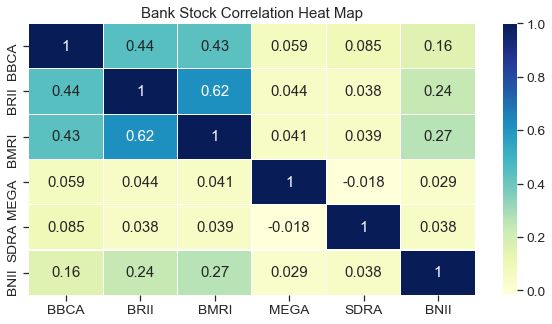

In [81]:
plt.figure(figsize = (10,5))
sns.heatmap(ratio_corr, annot = True, cmap = 'YlGnBu', linewidths = 0.05)
plt.title('Bank Stock Correlation Heat Map')

plt.savefig('Stock Corr Heatmap.png')
plt.show()

Dilihat dari heatmap di atas, korelasi antara saham BBCA, BRII, dan BMRI (saham bank yang terdaftar dalam LQ45) cukup kuat dibandingkan dengan korelasi dengan saham lainnya. Kedua saham bank milik negara, yaitu BRII dan BMRI menunjukkan korelasi paling kuat dengan nilai koefisien korelasi sebesar 0.62.

Dengan ini, investor dapat menyusun strategi untuk portfolio mereka. Saham-saham dengan korelasi yang tinggi dapat ditempatkan dalam portfolio yang terpisah. Sehingga jika harga salah satu saham (BBCA, BRII, maupun BMRI) mengalami penurunan, maka kerugian yang dialami dapat ditanggulangi.

</br>

### 3. Saving New Dataset

Karena pada saat modeling nanti saya hanya akan menggunakan harga `Close` dari masing-masing saham, maka feature lainnya akan saya drop. Dataset yang sudah diperbaharui akan disimpan dalam file _.csv_ baru.

In [8]:
compiled.to_csv('compiled_clean.csv')

In [44]:
bbca.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Change', 'Ratio(%)', 'Adj Ratio', 'Volume', 'Value(T)', 'Saham', 'Trend Category'], axis = 1, inplace = True)
bbca.to_csv('df_bbca.csv')

bbca.head()

,Close
Date,
2016-01-02,13225
2016-01-03,13400
2016-01-04,13300
2016-01-06,13175
2016-01-07,13225


In [45]:
mega.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Change', 'Ratio(%)', 'Adj Ratio', 'Volume', 'Value(T)', 'Saham', 'Trend Category'], axis = 1, inplace = True)
mega.to_csv('df_mega.csv')

In [46]:
bbri.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Change', 'Ratio(%)', 'Adj Ratio', 'Volume', 'Value(T)', 'Saham'], axis = 1, inplace = True)
bbri.to_csv('df_bbri.csv')

In [47]:
bmri.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Change', 'Ratio(%)', 'Adj Ratio', 'Volume', 'Value(T)', 'Saham'], axis = 1, inplace = True)
bmri.to_csv('df_bmri.csv')

In [48]:
sdra.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Change', 'Ratio(%)', 'Adj Ratio', 'Volume', 'Value(T)', 'Saham'], axis = 1, inplace = True)
sdra.to_csv('df_sdra.csv')

In [49]:
bnii.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Change', 'Ratio(%)', 'Adj Ratio', 'Volume', 'Value(T)', 'Saham'], axis = 1, inplace = True)
bnii.to_csv('df_bnii.csv')

</br>